# **IMPORTING NECESSARY LIBRARIES**

In [ ]:
import requests
import numpy as np
import time
from bs4 import BeautifulSoup
import pandas as pd
# !pip install git+http://github.com/LIAAD/yake
# import yake
# !pip install keybert
# from keybert import KeyBERT
from sklearn.preprocessing import OneHotEncoder
!pip install nltk
import nltk
nltk.download('all')
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gensim
!pip install pattern
from gensim import corpora
from gensim.utils import lemmatize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 55.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 KB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 29.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.4/348.4 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 KB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 60.1 MB/s eta 0:00:00
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332718 sha256=775c4cbda

# **LOADING THE DATASET**

In [ ]:
faculty_research_data=pd.read_csv('/content/faculty_research.csv',header=0,encoding='latin')
faculty_research_area=pd.read_csv('/content/faculty_research_areas.csv',header=0)

In [ ]:
faculty_research_data.head()

,Name,Citations_All,H-Index_All,i10-Index_All,Journals,Journal Description,No. of Journals
0,poomagal shanmugam,60,4,3,A novel method for clustering tweets in twitter,A popular social networking service called Twi...,11
1,poomagal shanmugam,60,4,3,K-means for search results clustering using ur...,Increasing volume of web has resulted in the f...,11
2,poomagal shanmugam,60,4,3,A novel method for selecting initial centroids...,"In data mining, clustering is a method of grou...",11
3,poomagal shanmugam,60,4,3,Optimized k-means clustering with intelligent ...,With the vast amount of information available ...,11
4,poomagal shanmugam,60,4,3,A novel Tag Score (T_S) model with improved K-...,Clustering of tweets is useful for analyzing t...,11


In [ ]:
faculty_research_area.head()

,Name,Research Areas
0,Dr.Thilaga M,Computational Neuroscience
1,Dr.Thilaga M,Cognitive Modelling and Analysis
2,Dr.Thilaga M,Social Network Analysis
3,Dr.Thilaga M,Graph Data Mining
4,Dr.Mohan K,Cloud Computing


In [ ]:
faculty_research_area['Research Areas']=faculty_research_area['Research Areas'].str.title()
faculty_research_area['Research Areas']=faculty_research_area['Research Areas'].str.strip()

# **EDA**

In [ ]:
faculty_research_area.nunique()

Name              40
Research Areas    64
dtype: int64

In [ ]:
faculty_research_area['Research Areas'].value_counts()

Machine Learning                    7
Optimization Techniques             3
Swarm Intelligence                  3
Cryptography                        3
Soft Computing                      3
                                   ..
Cognitive Modelling And Analysis    1
Computational Intelligence          1
Vehicle Routing                     1
Digital Image Processing            1
Queueing Models                     1
Name: Research Areas, Length: 64, dtype: int64

# **PREPROCESSING**

In [ ]:
faculty_research_data['Journal Description'].fillna('',inplace=True)
faculty_research_data['Title And Description']=faculty_research_data['Journals']+faculty_research_data['Journal Description']

In [ ]:
faculty_research_data['Journal Description'].fillna('',inplace=True) 

In [ ]:
one_hot=pd.get_dummies(faculty_research_area['Research Areas'])
faculty_research_area = faculty_research_area.join(one_hot)
faculty_research_area.drop('Research Areas',axis=1,inplace=True)
faculty_research_area.set_index('Name',inplace=True)
faculty_research_area = faculty_research_area.sum(level=0).reset_index()

In [ ]:
faculty_research_area.head()

,Name,vehicle Routing,Analysis of Electronic Voting and Payment Protocols,Applied Mathematics for Computer Science,Artificial Intelligence,Authentication Protocols for WSN and RFID,Big Data Analytics,Cognitive Modelling and Analysis,Complex Networked Systems,Component Based Software Engineering,...,Machine Learning,Natural Language Processing,Recommender Systems,Security Protocols and Formal Methods,Stability Analysis,Swarm Intelligence,TOPOLOGY,Wireless Networks,Wireless Sensor Networks,web security
0,Dr.Thilaga M,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Dr.Mohan K,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Dr.Poomagal S,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Dr.Sasikumar M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Mrs.Brindha N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
faculty_research_area.to_csv('faculty_research_areas.csv',index=False,header=True)

# **LDA FOR TOPICS**

In [ ]:
from gensim.parsing.preprocessing import preprocess_string
from gensim.utils import lemmatize
from nltk.stem import WordNetLemmatizer

documents=list(faculty_research_data['Journal Description'].dropna().values)
stopwords = set(gensim.parsing.preprocessing.STOPWORDS)
# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

processed_docs = [[lemmatizer.lemmatize(word) for word in document.lower().split() if word not in stopwords]
                  for document in documents]
# create a dictionary from the processed documents
dictionary = corpora.Dictionary(processed_docs)

# create a corpus from the dictionary and the processed documents
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# train the LDA model on the corpus
num_topics = 250
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# print the top 10 words in each topic
for topic in lda_model.show_topics(num_topics=num_topics, num_words=10):
    print(topic)

/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


(0, '0.035*"item" + 0.034*"problem" + 0.032*"algorithm" + 0.021*"search" + 0.021*"clustering" + 0.021*"known" + 0.021*"priority" + 0.019*"combinatorial" + 0.019*"set" + 0.016*"optimization"')
(1, '0.001*"computational" + 0.001*"prediction" + 0.001*"attribute" + 0.001*"churn" + 0.001*"pattern" + 0.001*"model" + 0.001*"research" + 0.001*"class" + 0.001*"algorithm" + 0.001*"classification"')
(2, '0.000*"(anfis)" + 0.000*"wrongly" + 0.000*"forte" + 0.000*"diagnose" + 0.000*"database," + 0.000*"classifierâ\x80\x99s" + 0.000*"antsâ\x80\x99." + 0.000*"anfis" + 0.000*"aided" + 0.000*"incidence"')
(3, '0.052*"energy" + 0.043*"consumption" + 0.024*"network" + 0.024*"tree" + 0.019*"model" + 0.014*"network." + 0.014*"result" + 0.014*"splitting" + 0.014*"malware" + 0.014*"decision"')
(4, '0.030*"prediction" + 0.024*"churn" + 0.018*"method" + 0.018*"classifier" + 0.015*"fractional" + 0.015*"model" + 0.012*"proposed" + 0.012*"algorithm" + 0.012*"approach" + 0.012*"learner"')
(5, '0.001*"learning" + 0

# **NON NEGATIVE MATRIX FACTORIZATION**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
dataset=faculty_research_data.copy()
dataset['Title And Description'] = dataset['Title And Description'].str.replace('[^\w\s]','')
# Create a TF-IDF vectorizer to convert the text into numerical features
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
tfidf = vectorizer.fit_transform(dataset['Title And Description'])

# Apply NMF to the TF-IDF matrix
nmf_model = NMF(n_components=len(dataset), random_state=0)
nmf_matrix = nmf_model.fit_transform(tfidf)

# Print the top 10 keywords for each topic
feature_names = vectorizer.get_feature_names_out()
for index, topic in enumerate(nmf_model.components_):
    print(f"Topic #{index}")
    print([feature_names[i] for i in topic.argsort()[-10:]])
    print('\n')

<ipython-input-9-d8c1d91a2d4d>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Title And Description'] = dataset['Title And Description'].str.replace('[^\w\s]','')


Topic #0
['encrypting', 'text', 'intelligence', 'using', 'classification', 'colony', 'ant', 'mammograms', 'segmentation', 'microcalcification']


Topic #1
['size', 'context', 'deletion', 'systems', 'rules', 'insertion', 'maximal', 'insertiondeletion', 'length', 'matrix']


Topic #2
['attacks', 'efficient', 'communication', 'important', 'informal', 'protocols', 'mutual', 'security', 'authentication', 'protocol']


Topic #3
['coefficient', 'formation', 'term', 'predatorâprey', 'predator', 'stability', 'pattern', 'model', 'harvesting', 'prey']


Topic #4
['expected', 'service', 'impatient', 'group', 'customers', 'server', 'queue', 'general', 'time', 'retrial']


Topic #5
['regions', 'complex', 'interactions', 'neuronal', 'mining', 'graph', 'common', 'pattern', 'functional', 'brain']


Topic #6
['distribute', 'accordingly', 'stopping', 'multiple', 'nodes', 'lifetime', 'sensor', 'mobile', 'network', 'sinks']


Topic #7
['routing', 'swarm', 'solved', 'operators', 'combinatorial', 'hybrid', '

# **LSA**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
dataset=faculty_research_data.copy()
dataset['Title And Description'] = dataset['Title And Description'].str.replace('[^\w\s]','')
# Create a TF-IDF vectorizer to convert the text into numerical features
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
tfidf = vectorizer.fit_transform(dataset['Title And Description'])

# Apply NMF to the TF-IDF matrix
lsa_model = TruncatedSVD(n_components=10, random_state=0)
lsa_matrix = lsa_model.fit_transform(tfidf)

# Print the top 10 keywords for each topic
feature_names = vectorizer.get_feature_names_out()
for index, topic in enumerate(nmf_model.components_):
    print(f"Topic #{index}")
    print([feature_names[i] for i in topic.argsort()[-10:]])
    print('\n')

Topic #0
['search', 'optimization', 'binary', 'image', 'method', 'isotonic', 'colony', 'ant', 'algorithm', 'classification']


Topic #1
['rules', 'matrix', 'context', 'component', 'string', 'maximal', 'systems', 'length', 'insertion', 'insertiondeletion']


Topic #2
['cloud', 'smart', 'communication', 'supply', 'chain', 'object', 'security', 'authentication', 'rfid', 'protocol']


Topic #3
['stochastic', 'results', 'delaydependent', 'nonlinear', 'delays', 'matrix', 'systems', 'derived', 'timevarying', 'stability']


Topic #4
['customer', 'time', 'customers', 'orbit', 'calls', 'vacation', 'queue', 'service', 'server', 'retrial']


Topic #5
['regions', 'load', 'complex', 'networks', 'activity', 'eeg', 'graph', 'functional', 'cognitive', 'brain']


Topic #6
['sink', 'wireless', 'static', 'sinks', 'energy', 'wsn', 'lifetime', 'sensor', 'network', 'mobile']


Topic #7
['knowledge', 'using', 'adaptive', 'detection', 'elearning', 'access', 'based', 'users', 'user', 'learning']


Topic #8
['in

<ipython-input-8-8097db57250b>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Title And Description'] = dataset['Title And Description'].str.replace('[^\w\s]','')


# **KAGGLE APPROACH**

In [ ]:
dataset=faculty_research_data.copy()
dataset['Word Count'] = dataset['Title And Description'].apply(lambda x: len(str(x).split(' ')))
dataset[['Journals','Word Count']].head()

,Journals,Word Count
0,A novel method for clustering tweets in twitter,152
1,K-means for search results clustering using ur...,163
2,A novel method for selecting initial centroids...,159
3,Optimized k-means clustering with intelligent ...,137
4,A novel Tag Score (T_S) model with improved K-...,156


In [ ]:
dataset['Word Count'].describe()

count    305.000000
mean     131.026230
std       54.999097
min        5.000000
25%      115.000000
50%      143.000000
75%      153.000000
max      279.000000
Name: Word Count, dtype: float64

In [ ]:
dataset[dataset['Word Count']<10].head()

,Name,Citations_All,H-Index_All,i10-Index_All,Journals,Journal Description,No. of Journals,Title And Description,Word Count
26,M. Thilaga,154,8,4,Brain Strain: How much is too much?,,16,Brain Strain: How much is too much?,7
28,sai sundara Krishnan,477,12,13,On ?-semi-open sets in topological spaces,,20,On ?-semi-open sets in topological spaces,6
29,sai sundara Krishnan,477,12,13,Operation approaches on semi-open sets and app...,,20,Operation approaches on semi-open sets and app...,7
41,sai sundara Krishnan,477,12,13,On Î±-Î³-open sets in topological spaces,,20,On Î±-Î³-open sets in topological spaces,6
99,Dr Malar B - PSGCT,23,3,0,Conformal Isotonic Separation for Binary Class...,,11,Conformal Isotonic Separation for Binary Class...,6


In [ ]:
freq = pd.Series(' '.join(dataset['Title And Description']).split()).value_counts()[:20]
freq

the         2313
of          1603
and         1134
to           938
is           799
in           787
a            785
for          527
with         402
are          384
The          356
on           244
that         238
using        229
this         221
by           219
based        194
an           186
as           182
proposed     168
dtype: int64

In [ ]:
freq1 =  pd.Series(' '.join(dataset 
         ['Title And Description']).split()).value_counts()[-20:]
freq1

typically         1
6-dimensional     1
tuple             1
e                 1
alone,            1
strictly          1
smaller           1
grammarsMatrix    1
rewriting,        1
prescribing       1
Typical           1
length,           1
(SSC)             1
grammars,         1
controlled        1
grammars.         1
(MSSC)            1
(3,               1
aspects.          1
Plane             1
dtype: int64

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [ ]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown", 'based']
stop_words = stop_words.union(new_words)

In [ ]:
corpus = []
for i in range(0, len(dataset)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['Title And Description'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [ ]:
corpus[5]

'cosine similarity pagerank calculationthis paper introduces method calculating rank web page content similarity link structure different ranking algorithm available literature calculate importance score web page basis ranking algorithm link structure web since link similar document important link dissimilar document combining content similarity link structure assigns higher rank relevant document cosine similarity measure used paper calculating similarity among document proposed technique compared existing ranking algorithm precision recall f measure'

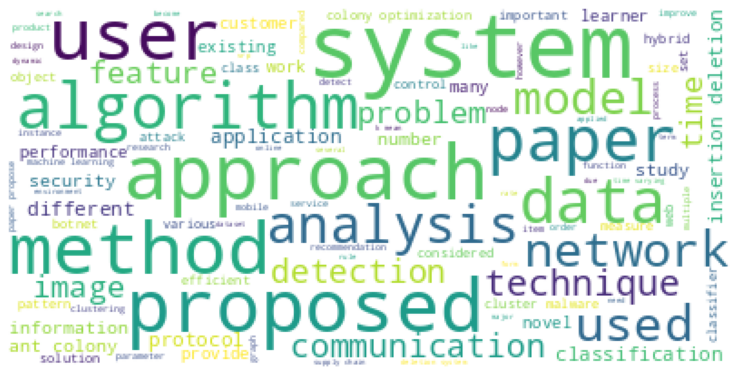

In [ ]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
import re
cv=CountVectorizer(max_df=0.8,stop_words=list(stop_words), max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [ ]:
list(cv.vocabulary_.keys())[:10]

['novel',
 'method',
 'clustering',
 'tweet',
 'popular',
 'social',
 'networking',
 'service',
 'called',
 'twitter']

[Text(0, 0, 'system'),
 Text(1, 0, 'network'),
 Text(2, 0, 'paper'),
 Text(3, 0, 'proposed'),
 Text(4, 0, 'algorithm'),
 Text(5, 0, 'method'),
 Text(6, 0, 'learning'),
 Text(7, 0, 'model'),
 Text(8, 0, 'data'),
 Text(9, 0, 'analysis'),
 Text(10, 0, 'time'),
 Text(11, 0, 'approach'),
 Text(12, 0, 'problem'),
 Text(13, 0, 'protocol'),
 Text(14, 0, 'user'),
 Text(15, 0, 'security'),
 Text(16, 0, 'number'),
 Text(17, 0, 'technique'),
 Text(18, 0, 'classification'),
 Text(19, 0, 'set')]

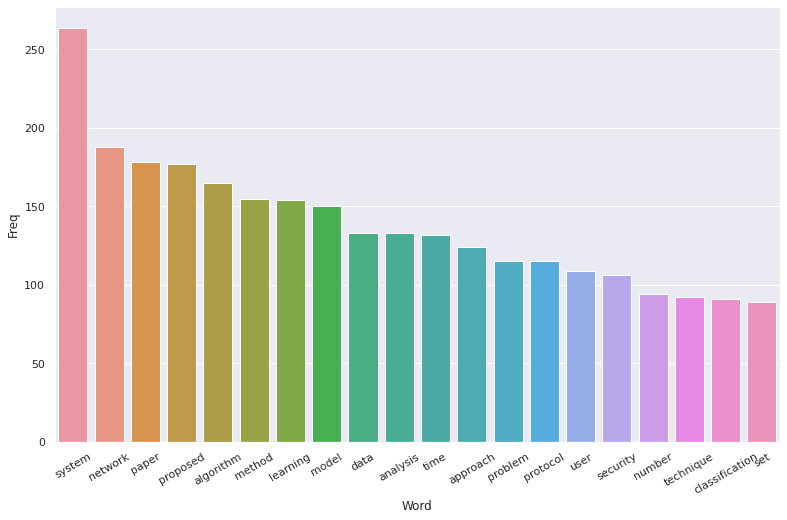

In [ ]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                    Bi-gram  Freq
0        insertion deletion    53
1                ant colony    48
2       colony optimization    40
3          machine learning    32
4           deletion system    28
5              supply chain    27
6              time varying    25
7            sensor network    24
8           vehicle routing    23
9           proposed method    22
10          wireless sensor    22
11          routing problem    22
12      isotonic separation    21
13  authentication protocol    21
14           neural network    21
15           maximal length    20
16           proposed model    19
17            binary search    19
18            varying delay    19
19         network lifetime    19


[Text(0, 0, 'insertion deletion'),
 Text(1, 0, 'ant colony'),
 Text(2, 0, 'colony optimization'),
 Text(3, 0, 'machine learning'),
 Text(4, 0, 'deletion system'),
 Text(5, 0, 'supply chain'),
 Text(6, 0, 'time varying'),
 Text(7, 0, 'sensor network'),
 Text(8, 0, 'vehicle routing'),
 Text(9, 0, 'proposed method'),
 Text(10, 0, 'wireless sensor'),
 Text(11, 0, 'routing problem'),
 Text(12, 0, 'isotonic separation'),
 Text(13, 0, 'authentication protocol'),
 Text(14, 0, 'neural network'),
 Text(15, 0, 'maximal length'),
 Text(16, 0, 'proposed model'),
 Text(17, 0, 'binary search'),
 Text(18, 0, 'varying delay'),
 Text(19, 0, 'network lifetime')]

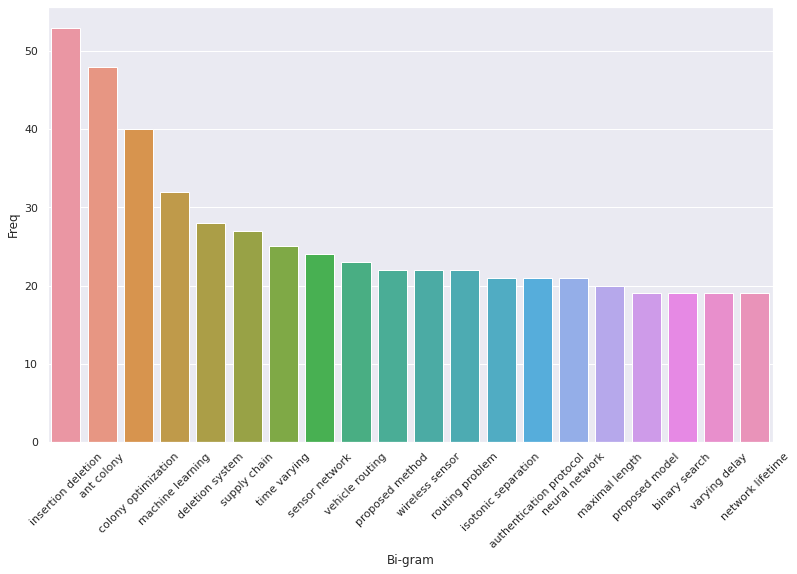

In [ ]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                            Tri-gram  Freq
0            ant colony optimization    39
1          insertion deletion system    28
2            vehicle routing problem    19
3                 time varying delay    19
4      controlled insertion deletion    17
5         graph controlled insertion    16
6            wireless sensor network    14
7           linear matrix inequality    14
8         machine learning technique    13
9           functional brain network    12
10       particle swarm optimization    12
11         teaching learning process    12
12  computational intelligence cyber    12
13       intelligence cyber security    12
14      cyber security computational    12
15    lyapunov krasovskii functional    12
16           supply chain management    11
17      security computational model    10
18  authentication key establishment    10
19        key establishment protocol    10


[Text(0, 0, 'ant colony optimization'),
 Text(1, 0, 'insertion deletion system'),
 Text(2, 0, 'vehicle routing problem'),
 Text(3, 0, 'time varying delay'),
 Text(4, 0, 'controlled insertion deletion'),
 Text(5, 0, 'graph controlled insertion'),
 Text(6, 0, 'wireless sensor network'),
 Text(7, 0, 'linear matrix inequality'),
 Text(8, 0, 'machine learning technique'),
 Text(9, 0, 'functional brain network'),
 Text(10, 0, 'particle swarm optimization'),
 Text(11, 0, 'teaching learning process'),
 Text(12, 0, 'computational intelligence cyber'),
 Text(13, 0, 'intelligence cyber security'),
 Text(14, 0, 'cyber security computational'),
 Text(15, 0, 'lyapunov krasovskii functional'),
 Text(16, 0, 'supply chain management'),
 Text(17, 0, 'security computational model'),
 Text(18, 0, 'authentication key establishment'),
 Text(19, 0, 'key establishment protocol')]

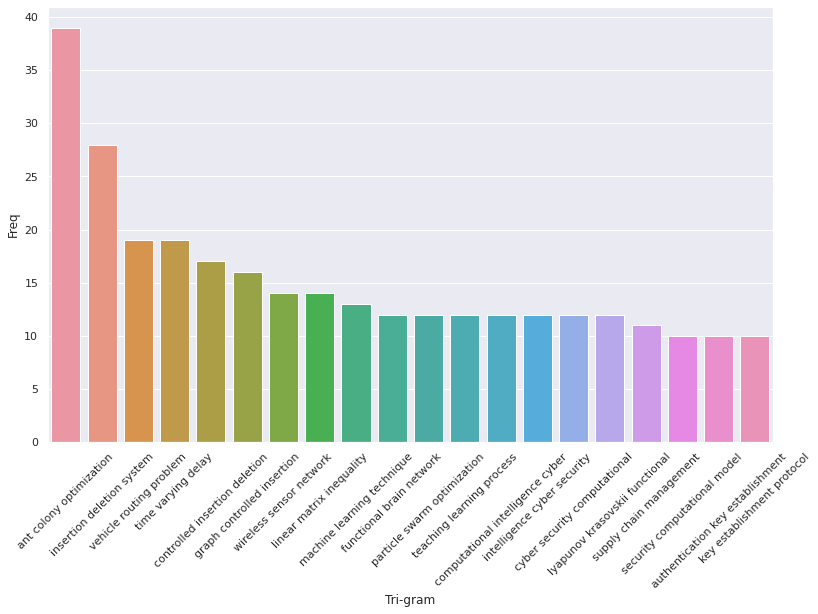

In [ ]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names_out()
 
# fetch document for which keywords needs to be extracted
doc=corpus[5]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [ ]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
research_corpus=[]
#sort the tf-idf vectors by descending order of scores
for i in range(len(corpus)):
  tf_idf_vector=tfidf_transformer.transform(cv.transform([corpus[i]]))
  sorted_items=sort_coo(tf_idf_vector.tocoo())
  #extract only the top n; n here is 10
  keywords=extract_topn_from_vector(feature_names,sorted_items,10)
  research_corpus.extend(keywords)
  # now print the results
  print("\nAbstract:")
  print(corpus[i])
  print("\nKeywords:")
  for k in keywords:
      print(k,keywords[k])


Abstract:
novel method clustering tweet twittera popular social networking service called twitter used post short message could useful someone world message analysed researcher different way paper proposes clustering technique cluster tweet twitter basic aim performing clustering identify group similar tweet posted information useful identify various user community user community recommended advertiser twitter matching topic interest advertiser field suffix tree clustering stc algorithm core web document clustering algorithm group similar document cluster constructing suffix tree used stc along semantic similarity among posted tweet identify topic interest proposed method compared stc lingo algorithm intra cluster

Keywords:
tweet 0.297
clustering 0.259
twitter 0.252
stc 0.252
user community 0.168
topic interest 0.168
suffix tree 0.168
suffix 0.168
group similar 0.168
advertiser 0.168

Abstract:
k mean search clustering url tag contentsincreasing volume web resulted flooding huge coll

In [ ]:
len(research_corpus)

2985

In [ ]:
len(set(research_corpus))

1871

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
# Perform lemmatization on list of words
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in set(research_corpus)]
filtered_topics = [word for word in lemmatized_words if word not in stop_words]

In [ ]:
len(set(filtered_topics))

1871

In [ ]:
set(research_corpus)

{'inertial neural network',
 'formative assessment',
 'baffle design',
 'working vacation',
 'biswas',
 'ap',
 'thesis',
 'design implementation',
 'staggeringly',
 'space regular space',
 'mc detection',
 'picture',
 'ratio dependent',
 'sample',
 'enhancement method',
 'threshold',
 'walking ant histogram',
 'human brain',
 'normal',
 'scm',
 'consumption',
 'cognitive',
 'pheromone',
 'spikelet fertility',
 'mr',
 'infertility',
 'model crowley',
 'binary classification',
 'multiple mobile',
 'seir model',
 'attempt',
 'credit card number',
 'towards personal',
 'prey',
 'basis heterosis',
 'similarity',
 'ransomwares signature',
 'diffusive predator',
 'leafcutter',
 'iterative',
 'iot',
 'particle swarm',
 'density dependent predator',
 'regression',
 'distribution warehouse kind',
 'ridge pattern',
 'switched neutral',
 'meme competing',
 'ant colony',
 'sliding',
 'proposed solve vrptw',
 'cognitive activity',
 'refuelling',
 'address port',
 'calculated',
 'element search space

In [ ]:
dataset['Title And Description']=corpus
dataset.head()

,Name,Citations_All,H-Index_All,i10-Index_All,Journals,Journal Description,No. of Journals,Title And Description,Word Count
0,poomagal shanmugam,60,4,3,A novel method for clustering tweets in twitter,A popular social networking service called Twi...,11,novel method clustering tweet twittera popular...,152
1,poomagal shanmugam,60,4,3,K-means for search results clustering using ur...,Increasing volume of web has resulted in the f...,11,k mean search clustering url tag contentsincre...,163
2,poomagal shanmugam,60,4,3,A novel method for selecting initial centroids...,"In data mining, clustering is a method of grou...",11,novel method selecting initial centroid k mean...,159
3,poomagal shanmugam,60,4,3,Optimized k-means clustering with intelligent ...,With the vast amount of information available ...,11,optimized k mean clustering intelligent initia...,137
4,poomagal shanmugam,60,4,3,A novel Tag Score (T_S) model with improved K-...,Clustering of tweets is useful for analyzing t...,11,novel tag score model improved k mean clusteri...,156


In [ ]:
columns={}
for column in research_corpus:
  values = []
  for text in dataset['Title And Description']:
      if column in text:
          values.append(1)
      else:
          values.append(0)
  columns[column] = values
df_columns=pd.DataFrame(columns)
df_result=pd.concat([dataset, df_columns], axis=1)
df_result.head()

,Name,Citations_All,H-Index_All,i10-Index_All,Journals,Journal Description,No. of Journals,Title And Description,Word Count,tweet,...,rendezvous,point selection enhance,point selection,network lifetime mobile,mobile carrier wireless,mobile carrier,steganography,plane,image steganography,random
0,poomagal shanmugam,60,4,3,A novel method for clustering tweets in twitter,A popular social networking service called Twi...,11,novel method clustering tweet twittera popular...,152,1,...,0,0,0,0,0,0,0,0,0,0
1,poomagal shanmugam,60,4,3,K-means for search results clustering using ur...,Increasing volume of web has resulted in the f...,11,k mean search clustering url tag contentsincre...,163,0,...,0,0,0,0,0,0,0,0,0,0
2,poomagal shanmugam,60,4,3,A novel method for selecting initial centroids...,"In data mining, clustering is a method of grou...",11,novel method selecting initial centroid k mean...,159,0,...,0,0,0,0,0,0,0,0,0,0
3,poomagal shanmugam,60,4,3,Optimized k-means clustering with intelligent ...,With the vast amount of information available ...,11,optimized k mean clustering intelligent initia...,137,0,...,0,0,0,0,0,0,0,0,0,0
4,poomagal shanmugam,60,4,3,A novel Tag Score (T_S) model with improved K-...,Clustering of tweets is useful for analyzing t...,11,novel tag score model improved k mean clusteri...,156,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
sums = {}
for col in research_corpus:
    sums[col] = df_result[col].sum()
print(sums)

{'tweet': 3, 'clustering': 19, 'twitter': 1, 'stc': 1, 'user community': 1, 'topic interest': 1, 'suffix tree': 1, 'suffix': 1, 'group similar': 1, 'advertiser': 1, 'web': 17, 'web page': 5, 'page': 7, 'web page clustering': 2, 'web document': 2, 'page clustering': 2, 'document': 13, 'term': 59, 'tag': 43, 'dataset': 13, 'centroid': 6, 'point': 14, 'initial centroid': 5, 'clustering algorithm': 8, 'initial': 15, 'partitioning': 1, 'selecting initial centroid': 2, 'selecting initial': 2, 'cluster': 25, 'snippet': 3, 'vector': 7, 'mean': 31, 'score': 10, 'tag score': 2, 'model improved mean': 0, 'model improved': 3, 'improved mean': 0, 'word': 19, 'tag score model': 2, 'score model improved': 2, 'link': 9, 'similarity': 15, 'ranking algorithm': 3, 'link structure': 3, 'ranking': 6, 'similarity link structure': 1, 'similarity link': 1, 'content similarity link': 1, 'content similarity': 1, 'semantic': 13, 'semantic similarity': 2, 'similarity among': 3, 'measure': 31, 'link analysis': 1, 

In [ ]:
filtered_cols=[k for k,v in sums.items() if v<2]
print(len(filtered_cols))

720


In [ ]:
df_result.drop(filtered_cols,axis=1,inplace=True)

In [ ]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 1160 entries, Name to random
dtypes: int64(1156), object(4)
memory usage: 2.7+ MB


In [ ]:
df_result.describe()

,Citations_All,H-Index_All,i10-Index_All,No. of Journals,Word Count,tweet,clustering,web,web page,page,...,rendezvous,point selection enhance,point selection,network lifetime mobile,mobile carrier wireless,mobile carrier,steganography,plane,image steganography,random
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,...,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,238.990164,7.186885,6.265574,16.121311,131.026230,0.009836,0.062295,0.055738,0.016393,0.022951,...,0.006557,0.006557,0.006557,0.006557,0.006557,0.006557,0.009836,0.009836,0.009836,0.055738
std,162.452837,3.243591,4.305554,4.600669,54.999097,0.098850,0.242088,0.229792,0.127192,0.149993,...,0.080844,0.080844,0.080844,0.080844,0.080844,0.080844,0.098850,0.098850,0.098850,0.229792
min,2.000000,1.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,119.000000,5.000000,4.000000,12.000000,115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,167.000000,7.000000,5.000000,19.000000,143.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,349.000000,9.000000,9.000000,20.000000,153.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,506.000000,13.000000,14.000000,20.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_result.to_csv('faculty_research_paper_keywords.csv',index=False,header=True)

In [ ]:
faculty_research_data=df_result.copy()

In [ ]:
faculty_research_data.head()

,Name,Citations_All,H-Index_All,i10-Index_All,Journals,Journal Description,No. of Journals,Title And Description,Word Count,tweet,...,rendezvous,point selection enhance,point selection,network lifetime mobile,mobile carrier wireless,mobile carrier,steganography,plane,image steganography,random
0,poomagal shanmugam,60,4,3,A novel method for clustering tweets in twitter,A popular social networking service called Twi...,11,novel method clustering tweet twittera popular...,152,1,...,0,0,0,0,0,0,0,0,0,0
1,poomagal shanmugam,60,4,3,K-means for search results clustering using ur...,Increasing volume of web has resulted in the f...,11,k mean search clustering url tag contentsincre...,163,0,...,0,0,0,0,0,0,0,0,0,0
2,poomagal shanmugam,60,4,3,A novel method for selecting initial centroids...,"In data mining, clustering is a method of grou...",11,novel method selecting initial centroid k mean...,159,0,...,0,0,0,0,0,0,0,0,0,0
3,poomagal shanmugam,60,4,3,Optimized k-means clustering with intelligent ...,With the vast amount of information available ...,11,optimized k mean clustering intelligent initia...,137,0,...,0,0,0,0,0,0,0,0,0,0
4,poomagal shanmugam,60,4,3,A novel Tag Score (T_S) model with improved K-...,Clustering of tweets is useful for analyzing t...,11,novel tag score model improved k mean clusteri...,156,1,...,0,0,0,0,0,0,0,0,0,1


# **FACULTY TOPIC MATRIX**

In [ ]:
research_paper_topic_matrix=faculty_research_data.drop(['Citations_All','H-Index_All','i10-Index_All','Journal Description','No. of Journals','Title And Description','Word Count'],axis=1)
research_paper_topic_matrix.head()

,Name,Journals,tweet,clustering,web,web page,page,web page clustering,web document,page clustering,...,rendezvous,point selection enhance,point selection,network lifetime mobile,mobile carrier wireless,mobile carrier,steganography,plane,image steganography,random
0,poomagal shanmugam,A novel method for clustering tweets in twitter,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,poomagal shanmugam,K-means for search results clustering using ur...,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,poomagal shanmugam,A novel method for selecting initial centroids...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,poomagal shanmugam,Optimized k-means clustering with intelligent ...,0,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,poomagal shanmugam,A novel Tag Score (T_S) model with improved K-...,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
faculty_topic = research_paper_topic_matrix.set_index('Name').drop('Journals',axis=1)
faculty_topic = faculty_topic.sum(level=0)
faculty_topic.head()

<ipython-input-89-21868f29b923>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  faculty_topic = faculty_topic.sum(level=0)


,tweet,clustering,web,web page,page,web page clustering,web document,page clustering,document,term,...,rendezvous,point selection enhance,point selection,network lifetime mobile,mobile carrier wireless,mobile carrier,steganography,plane,image steganography,random
Name,,,,,,,,,,,,,,,,,,,,,
poomagal shanmugam,2,6,7,5,5,2,2,2,6,4,...,0,0,0,0,0,0,0,0,0,1
M. Thilaga,0,3,1,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
sai sundara Krishnan,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
"Muthukrishnan, Senthil Kumar",0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,2,0,3
Ramanathan Periakaruppan,0,3,2,0,0,0,0,0,3,4,...,0,0,0,0,0,0,0,0,0,0


# **COSINE SIMILARITY**

In [ ]:
def cosine_similarity_matrix(df):
  data = df.to_numpy()
  m, n = df.shape
  distances = np.zeros((m,m))
  for i in range(m):
      for j in range(m):
          distances[i,j] = np.dot(data[i,:],data[j,:])/(np.linalg.norm(data[i,:])*np.linalg.norm(data[j,:]))
  return distances

In [ ]:
faculty_names=list(faculty_topic.index)
print(faculty_names)

['poomagal shanmugam', 'M. Thilaga', 'sai sundara Krishnan', 'Muthukrishnan,  Senthil Kumar', 'Ramanathan Periakaruppan', 'Shina Sheen', 'Dr Malar B - PSGCT', 'Indhumathi Raman', 'Dr.V Senthil Kumaran', 'Latha R', 'Dr. Poonthalir Ganesan', 'kaja mohideen', 'Venkatasamy Sureshkumar', 'S Anandhi', 'Sreelaja N.K', 'Kumaresan M', 'Sreeja N.K', 'Priya Ramasamy', 'Dr.G.Kirubavathi', 'R. Krishnasamy', 'M. Sivakumar', 'Regis Anne W']


In [ ]:
cosine_similarity = cosine_similarity_matrix(faculty_topic)

In [ ]:
print(cosine_similarity.shape)

(22, 22)


### **COSINE SIMILARITY RESULTS**

In [ ]:
for i in range(len(cosine_similarity)):
  for j in range(i+1,len(cosine_similarity)):
    if cosine_similarity[i][j]>0:
      print(faculty_names[i],"-->",faculty_names[j],"  =   ",cosine_similarity[i][j])

poomagal shanmugam --> M. Thilaga   =    0.4647758796352282
poomagal shanmugam --> sai sundara Krishnan   =    0.49598129506129673
poomagal shanmugam --> Muthukrishnan,  Senthil Kumar   =    0.45603518446964303
poomagal shanmugam --> Ramanathan Periakaruppan   =    0.5371761383329915
poomagal shanmugam --> Shina Sheen   =    0.5502079611620595
poomagal shanmugam --> Dr Malar B - PSGCT   =    0.5614877635471702
poomagal shanmugam --> Indhumathi Raman   =    0.3539802735619939
poomagal shanmugam --> Dr.V Senthil Kumaran   =    0.48495264219013723
poomagal shanmugam --> Latha R   =    0.41774896442397724
poomagal shanmugam --> Dr. Poonthalir Ganesan   =    0.38814612547240995
poomagal shanmugam --> kaja mohideen   =    0.4483426234367233
poomagal shanmugam --> Venkatasamy Sureshkumar   =    0.42854345789088766
poomagal shanmugam --> S Anandhi   =    0.3868027511360862
poomagal shanmugam --> Sreelaja N.K   =    0.5157021024322552
poomagal shanmugam --> Kumaresan M   =    0.3118578183735111

In [ ]:
faculty_topic.loc[['poomagal shanmugam','Muthukrishnan,  Senthil Kumar']]

,tweet,clustering,web,web page,page,web page clustering,web document,page clustering,document,term,...,rendezvous,point selection enhance,point selection,network lifetime mobile,mobile carrier wireless,mobile carrier,steganography,plane,image steganography,random
Name,,,,,,,,,,,,,,,,,,,,,
poomagal shanmugam,2,6,7,5,5,2,2,2,6,4,...,0,0,0,0,0,0,0,0,0,1
"Muthukrishnan, Senthil Kumar",0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,2,0,3


# **VISUALIZATION** 

## **H-Index for faculties**

<Figure size 504x504 with 0 Axes>

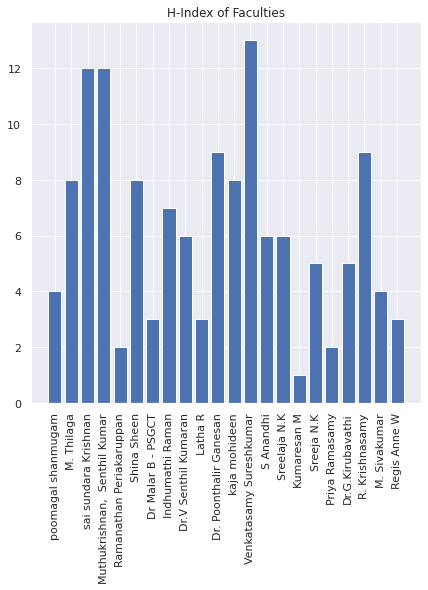

In [ ]:
fig = plt.figure(figsize=(7,7))
fig = plt.figure(figsize=(7, 7))
plt.bar(faculty_research_data.Name, faculty_research_data['H-Index_All'], align='center')
plt.xticks(rotation=90)
plt.title("H-Index of Faculties")
plt.show()

## **Citations for faculties**

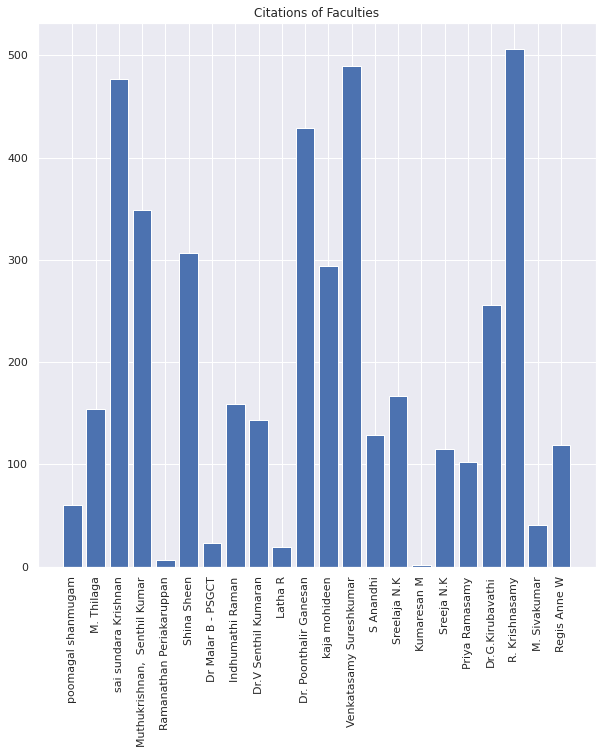

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.bar(faculty_research_data.Name, faculty_research_data['Citations_All'], align='center')
plt.xticks(rotation=90)
plt.title("Citations of Faculties")
plt.show()

## **i-10 Index for faculties**

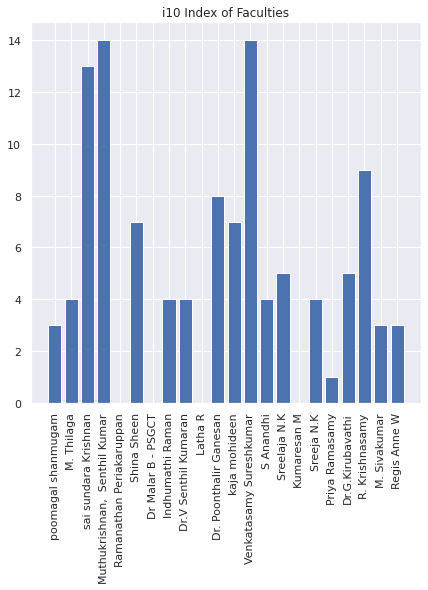

In [ ]:
fig = plt.figure(figsize=(7,7))
plt.bar(faculty_research_data.Name, faculty_research_data['i10-Index_All'], align='center')
plt.xticks(rotation=90)
plt.title("i10 Index of Faculties")
plt.show()

## **No. of Journals Published**

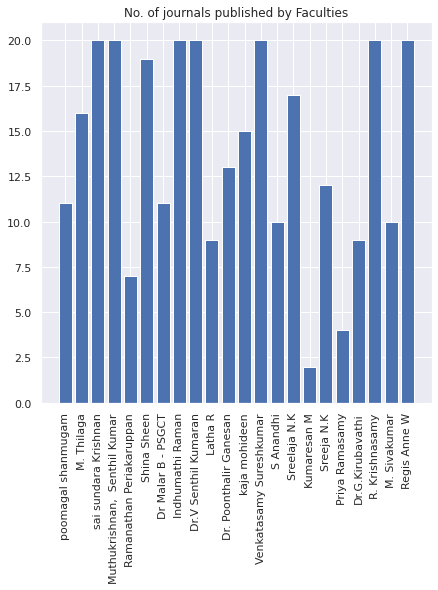

In [ ]:
fig = plt.figure(figsize=(7,7))
plt.bar(faculty_research_data.Name, faculty_research_data['No. of Journals'], align='center')
plt.xticks(rotation=90)
plt.title("No. of journals published by Faculties")
plt.show()

## **Cosine Similarity**

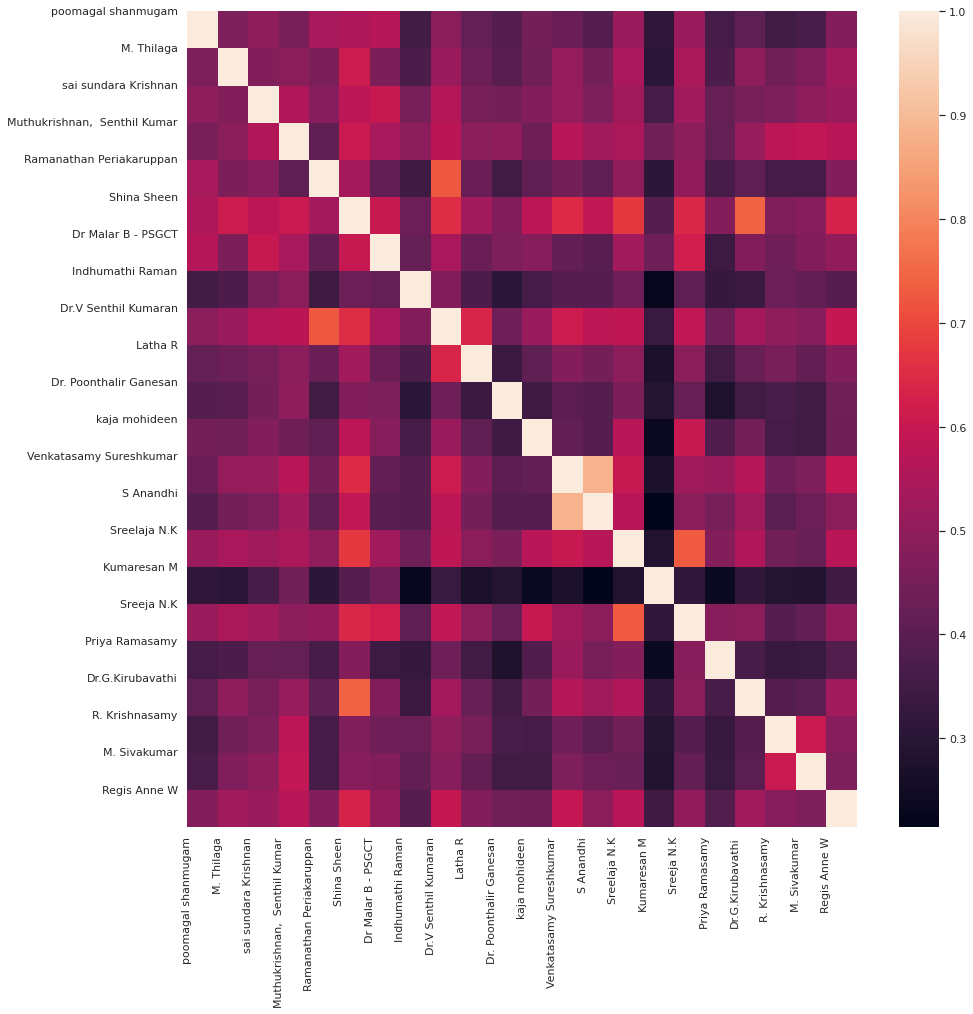

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(15, 15))
fig=sns.heatmap(cosine_similarity,linecolor="white")
fig=plt.xticks(range(len(cosine_similarity)), faculty_names)
fig=plt.yticks(range(len(cosine_similarity)), faculty_names)
fig=plt.xticks(rotation=90)
fig=plt.yticks(rotation=360)

## **Word Cloud**

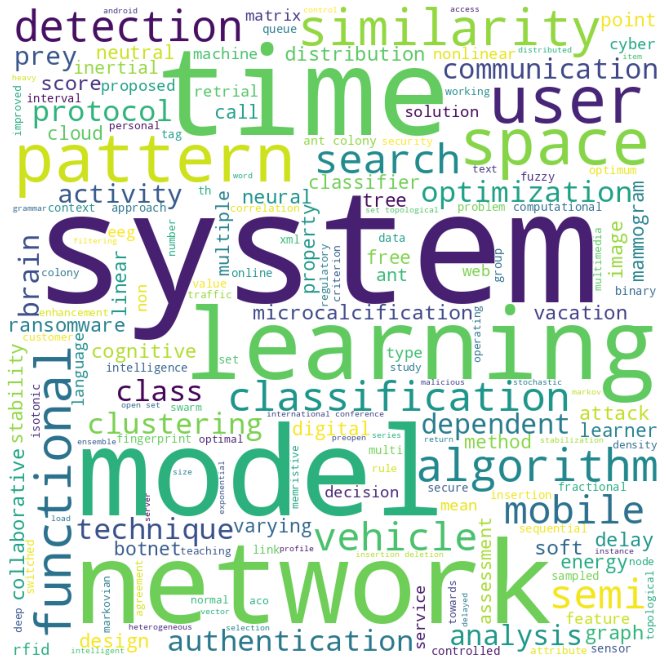

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(filtered_topics))

# Display the word cloud using matplotlib
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **K NEAREST NEIGHBOURS**

In [ ]:
def euclid_dist(t1, t2):
  distance = np.linalg.norm(t1 - t2)
  return distance

In [ ]:
def k_closest(sim_df,k):
  result1 = []
  k_closest = []
  i = 0
  j = 0
  for i, row1 in sim_df.iterrows():
    result = []
    for j, row2 in sim_df.iterrows():
      if i == j:
        distance = 10000
      else:
        distance = euclid_dist(row1,row2)
      result.append(distance)
    k_closest.append(np.argsort(result)[:k])
  return k_closest

In [ ]:
def get_k_nearest_faculty(k_closest):
  global faculty_names
  return [faculty_names[x] for x in k_closest]

In [ ]:
K_nearest = k_closest(faculty_topic,5)

### **K CLOSEST FACULTY**

In [ ]:
for i in  range(len(K_nearest)):
  print("*******",faculty_names[i],"*********")
  for i in get_k_nearest_faculty(K_nearest[i]):
    print(i)

******* poomagal shanmugam *********
Ramanathan Periakaruppan
Priya Ramasamy
Dr Malar B - PSGCT
Kumaresan M
Latha R
******* M. Thilaga *********
Sreeja N.K
Dr.G.Kirubavathi
Shina Sheen
M. Sivakumar
Ramanathan Periakaruppan
******* sai sundara Krishnan *********
Dr Malar B - PSGCT
M. Sivakumar
Ramanathan Periakaruppan
poomagal shanmugam
Latha R
******* Muthukrishnan,  Senthil Kumar *********
M. Sivakumar
Dr Malar B - PSGCT
S Anandhi
Dr.V Senthil Kumaran
Dr.G.Kirubavathi
******* Ramanathan Periakaruppan *********
Priya Ramasamy
Kumaresan M
Latha R
poomagal shanmugam
M. Sivakumar
******* Shina Sheen *********
Dr.G.Kirubavathi
Sreeja N.K
Dr.V Senthil Kumaran
Sreelaja N.K
Dr Malar B - PSGCT
******* Dr Malar B - PSGCT *********
poomagal shanmugam
Ramanathan Periakaruppan
Kumaresan M
Priya Ramasamy
M. Sivakumar
******* Indhumathi Raman *********
M. Sivakumar
Dr Malar B - PSGCT
Dr.V Senthil Kumaran
sai sundara Krishnan
S Anandhi
******* Dr.V Senthil Kumaran *********
Ramanathan Periakaruppan
L